In [85]:
import requests #The requests module allows you to send HTTP requests using Python.

In [86]:
standings_url = 'https://fbref.com/en/comps/9/Premier-League-Stats'

In [87]:
import time
data = requests.get(standings_url) #makes http request to server and downloads the html of specified page
# if data.status_code == 429:
#   time.sleep(int(data.headers["Retry-After"]))
data

<Response [200]>

In [88]:
#%pip install BeautifulSoup4
from bs4 import BeautifulSoup

#allows us to parse the html. 
#It creates a parse tree for documents that can be used to extract data from HTML, which is useful for web scraping.

In [89]:
soup = BeautifulSoup(data.text)

In [90]:
standings_table = soup.select('table.stats_table')[0] #css selector to select table with class name stats_table

In [91]:
standings_table

<table class="stats_table sortable min_width force_mobilize" data-cols-to-freeze=",2" id="results2024-202591_overall"> <caption>Premier League Table</caption> <colgroup><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/></colgroup> <thead> <tr> <th aria-label="Rank" class="poptip sort_default_asc center" data-stat="rank" data-tip="&lt;strong&gt;Rank&lt;/strong&gt;&lt;br&gt;Squad finish in competition&lt;br&gt;Finish within the league or competition.&lt;br&gt;For knockout competitions may show final round reached.&lt;br&gt;Colors and arrows represent promotion/relegation or qualifiation for continental cups.&lt;br&gt;Trophy indicates team won league whether by playoffs or by leading the table.&lt;br&gt;Star indicates topped table in league USING another means of naming champion." scope="col">Rk</th> <th aria-label="Squad" class="poptip sort_default_asc center" data-stat="team" scope="col">Squad</th> <th aria-label="Mat

In [92]:
links = standings_table.find_all('a') 
#in the standings table there is a link to every teams' results (the link is in the <a> tag)

In [93]:
links = [l.get('href') for l in links]

In [94]:
links = [l for l in links if '/squads/' in l]  #only want the links with /squads/ in it

In [95]:
links

['/en/squads/b8fd03ef/Manchester-City-Stats',
 '/en/squads/822bd0ba/Liverpool-Stats',
 '/en/squads/18bb7c10/Arsenal-Stats',
 '/en/squads/8602292d/Aston-Villa-Stats',
 '/en/squads/cff3d9bb/Chelsea-Stats',
 '/en/squads/d07537b9/Brighton-and-Hove-Albion-Stats',
 '/en/squads/e4a775cb/Nottingham-Forest-Stats',
 '/en/squads/361ca564/Tottenham-Hotspur-Stats',
 '/en/squads/cd051869/Brentford-Stats',
 '/en/squads/fd962109/Fulham-Stats',
 '/en/squads/4ba7cbea/Bournemouth-Stats',
 '/en/squads/b2b47a98/Newcastle-United-Stats',
 '/en/squads/7c21e445/West-Ham-United-Stats',
 '/en/squads/19538871/Manchester-United-Stats',
 '/en/squads/a2d435b3/Leicester-City-Stats',
 '/en/squads/d3fd31cc/Everton-Stats',
 '/en/squads/47c64c55/Crystal-Palace-Stats',
 '/en/squads/b74092de/Ipswich-Town-Stats',
 '/en/squads/8cec06e1/Wolverhampton-Wanderers-Stats',
 '/en/squads/33c895d4/Southampton-Stats']

In [96]:
team_urls = [f"https://fbref.com{l}" for l in links] #create list of all the teams urls/links

In [97]:
team_urls

['https://fbref.com/en/squads/b8fd03ef/Manchester-City-Stats',
 'https://fbref.com/en/squads/822bd0ba/Liverpool-Stats',
 'https://fbref.com/en/squads/18bb7c10/Arsenal-Stats',
 'https://fbref.com/en/squads/8602292d/Aston-Villa-Stats',
 'https://fbref.com/en/squads/cff3d9bb/Chelsea-Stats',
 'https://fbref.com/en/squads/d07537b9/Brighton-and-Hove-Albion-Stats',
 'https://fbref.com/en/squads/e4a775cb/Nottingham-Forest-Stats',
 'https://fbref.com/en/squads/361ca564/Tottenham-Hotspur-Stats',
 'https://fbref.com/en/squads/cd051869/Brentford-Stats',
 'https://fbref.com/en/squads/fd962109/Fulham-Stats',
 'https://fbref.com/en/squads/4ba7cbea/Bournemouth-Stats',
 'https://fbref.com/en/squads/b2b47a98/Newcastle-United-Stats',
 'https://fbref.com/en/squads/7c21e445/West-Ham-United-Stats',
 'https://fbref.com/en/squads/19538871/Manchester-United-Stats',
 'https://fbref.com/en/squads/a2d435b3/Leicester-City-Stats',
 'https://fbref.com/en/squads/d3fd31cc/Everton-Stats',
 'https://fbref.com/en/squads/

In [98]:
team_url = team_urls[0] # link to first team
team_url

'https://fbref.com/en/squads/b8fd03ef/Manchester-City-Stats'

In [99]:
data = requests.get(team_url) # use requests to get link to first team's page 

In [100]:
#%pip install pandas
#%pip install --upgrade pip
#%pip install lxml
import pandas as pd

matches = pd.read_html(team_url, match="Scores & Fixtures")

In [101]:
matches[0]

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,xG,xGA,Poss,Attendance,Captain,Formation,Opp Formation,Referee,Match Report,Notes
0,2024-08-10,15:00,FA Community Shield,FA Community Shield,Sat,Home,D,1 (7),1 (6),Manchester Utd,NaN,NaN,56.0,78146.0,Rúben Dias,4-3-3,4-2-3-1,Jarred Gillett,Match Report,Manchester City won on penalty kicks following...
1,2024-08-18,16:30,Premier League,Matchweek 1,Sun,Away,W,2,0,Chelsea,0.8,1.0,52.0,39818.0,Kevin De Bruyne,3-2-4-1,4-2-3-1,Anthony Taylor,Match Report,NaN
2,2024-08-24,15:00,Premier League,Matchweek 2,Sat,Home,W,4,1,Ipswich Town,3.3,0.3,75.0,53147.0,Kevin De Bruyne,3-2-4-1,5-4-1,Samuel Allison,Match Report,NaN
3,2024-08-31,17:30,Premier League,Matchweek 3,Sat,Away,W,3,1,West Ham,3.0,0.7,67.0,62469.0,Kevin De Bruyne,3-2-4-1,4-2-3-1,Michael Oliver,Match Report,NaN
4,2024-09-14,15:00,Premier League,Matchweek 4,Sat,Home,W,2,1,Brentford,2.1,1.0,54.0,52148.0,Kyle Walker,4-2-3-1,5-3-2,Darren Bond,Match Report,NaN
5,2024-09-18,20:00,Champions Lg,League phase,Wed,Home,D,0,0,it Inter,2.3,0.7,60.0,50922.0,Kevin De Bruyne,3-2-4-1,3-5-2,Glenn Nyberg,Match Report,NaN
6,2024-09-22,16:30,Premier League,Matchweek 5,Sun,Home,D,2,2,Arsenal,2.1,0.7,77.0,52846.0,Kyle Walker,4-3-3,4-4-2,Michael Oliver,Match Report,NaN
7,2024-09-24,19:45,EFL Cup,Third round,Tue,Home,W,2,1,Watford,NaN,NaN,72.0,40584.0,Kyle Walker,3-2-4-1,5-3-2,David Webb,Match Report,NaN
8,2024-09-28,12:30,Premier League,Matchweek 6,Sat,Away,D,1,1,Newcastle Utd,0.9,1.6,62.0,52248.0,Kyle Walker,4-2-3-1,4-3-3,Jarred Gillett,Match Report,NaN
9,2024-10-01,21:00,Champions Lg,League phase,Tue,Away,W,4,0,sk Slovan Bratislava,3.7,0.1,75.0,22500.0,İlkay Gündoğan,4-2-3-1,4-2-3-1,Davide Massa,Match Report,NaN


In [102]:
soup = BeautifulSoup(data.text)

In [103]:
links = soup.find_all('a')

In [104]:
links = [l.get('href') for l in links]

In [105]:
links = [l for l in links if l and 'all_comps/shooting/' in l] #get link to shooting stats for team 

In [106]:
links

['/en/squads/b8fd03ef/2024-2025/matchlogs/all_comps/shooting/Manchester-City-Match-Logs-All-Competitions',
 '/en/squads/b8fd03ef/2024-2025/matchlogs/all_comps/shooting/Manchester-City-Match-Logs-All-Competitions',
 '/en/squads/b8fd03ef/2024-2025/matchlogs/all_comps/shooting/Manchester-City-Match-Logs-All-Competitions',
 '/en/squads/b8fd03ef/2024-2025/matchlogs/all_comps/shooting/Manchester-City-Match-Logs-All-Competitions']

In [107]:
link = f"https://fbref.com{links[0]}"
link

'https://fbref.com/en/squads/b8fd03ef/2024-2025/matchlogs/all_comps/shooting/Manchester-City-Match-Logs-All-Competitions'

In [108]:
data = requests.get(link)

In [109]:
shooting = pd.read_html(link, match="Shooting")[0]

In [110]:
shooting.head()

For Manchester City                                                        \
                 Date   Time                 Comp                Round  Day   
0          2024-08-10  15:00  FA Community Shield  FA Community Shield  Sat   
1          2024-08-18  16:30       Premier League          Matchweek 1  Sun   
2          2024-08-24  15:00       Premier League          Matchweek 2  Sat   
3          2024-08-31  17:30       Premier League          Matchweek 3  Sat   
4          2024-09-14  15:00       Premier League          Matchweek 4  Sat   

                                              ... Standard                \
  Venue Result     GF     GA        Opponent  ...     Dist   FK PK PKatt   
0  Home      D  1 (7)  1 (6)  Manchester Utd  ...      NaN  NaN  0     0   
1  Away      W      2      0         Chelsea  ...     19.1  0.0  0     0   
2  Home      W      4      1    Ipswich Town  ...     17.8  1.0  1     1   
3  Away      W      3      1        West Ham  ...     15.0  1.0  0     0   
4  Home      W      2      1       Brentford  ...     17.2  0.0  0     0   

  Expected                           Unnamed: 25_level_0  
        xG npxG npxG/Sh G-xG np:G-xG        Match Report  
0      NaN  NaN     NaN  NaN     NaN        Match Report  
1      0.8  0.8    0.07  1.2     1.2        Match Report  
2      3.3  2.6    0.20  0.7     0.4        Match Report  
3      3.0  3.0    0.13  0.0     0.0        Match Report  
4      2.1  2.1    0.12 -0.1    -0.1        Match Report  

[5 rows x 26 columns]

In [111]:
#we have a multi level index above, which is not useful. We will make a single lvel index
shooting.columns = shooting.columns.droplevel()

In [112]:
shooting.head()

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,...,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,Match Report
0,2024-08-10,15:00,FA Community Shield,FA Community Shield,Sat,Home,D,1 (7),1 (6),Manchester Utd,...,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,Match Report
1,2024-08-18,16:30,Premier League,Matchweek 1,Sun,Away,W,2,0,Chelsea,...,19.1,0.0,0,0,0.8,0.8,0.07,1.2,1.2,Match Report
2,2024-08-24,15:00,Premier League,Matchweek 2,Sat,Home,W,4,1,Ipswich Town,...,17.8,1.0,1,1,3.3,2.6,0.20,0.7,0.4,Match Report
3,2024-08-31,17:30,Premier League,Matchweek 3,Sat,Away,W,3,1,West Ham,...,15.0,1.0,0,0,3.0,3.0,0.13,0.0,0.0,Match Report
4,2024-09-14,15:00,Premier League,Matchweek 4,Sat,Home,W,2,1,Brentford,...,17.2,0.0,0,0,2.1,2.1,0.12,-0.1,-0.1,Match Report


In [113]:
#we now have two dataframes: matches and shooting. We want to merge these into one df called team_data
team_data = matches[0].merge(shooting[["Date", "Sh", "SoT", "Dist", "FK", "PK", "PKatt"]], on="Date")

In [114]:
team_data.head()

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,...,Opp Formation,Referee,Match Report,Notes,Sh,SoT,Dist,FK,PK,PKatt
0,2024-08-10,15:00,FA Community Shield,FA Community Shield,Sat,Home,D,1 (7),1 (6),Manchester Utd,...,4-2-3-1,Jarred Gillett,Match Report,Manchester City won on penalty kicks following...,9,1,NaN,NaN,0,0
1,2024-08-18,16:30,Premier League,Matchweek 1,Sun,Away,W,2,0,Chelsea,...,4-2-3-1,Anthony Taylor,Match Report,NaN,11,5,19.1,0.0,0,0
2,2024-08-24,15:00,Premier League,Matchweek 2,Sat,Home,W,4,1,Ipswich Town,...,5-4-1,Samuel Allison,Match Report,NaN,13,4,17.8,1.0,1,1
3,2024-08-31,17:30,Premier League,Matchweek 3,Sat,Away,W,3,1,West Ham,...,4-2-3-1,Michael Oliver,Match Report,NaN,23,8,15.0,1.0,0,0
4,2024-09-14,15:00,Premier League,Matchweek 4,Sat,Home,W,2,1,Brentford,...,5-3-2,Darren Bond,Match Report,NaN,18,7,17.2,0.0,0,0


In [115]:
team_data

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,...,Opp Formation,Referee,Match Report,Notes,Sh,SoT,Dist,FK,PK,PKatt
0,2024-08-10,15:00,FA Community Shield,FA Community Shield,Sat,Home,D,1 (7),1 (6),Manchester Utd,...,4-2-3-1,Jarred Gillett,Match Report,Manchester City won on penalty kicks following...,9,1,NaN,NaN,0,0
1,2024-08-18,16:30,Premier League,Matchweek 1,Sun,Away,W,2,0,Chelsea,...,4-2-3-1,Anthony Taylor,Match Report,NaN,11,5,19.1,0.0,0,0
2,2024-08-24,15:00,Premier League,Matchweek 2,Sat,Home,W,4,1,Ipswich Town,...,5-4-1,Samuel Allison,Match Report,NaN,13,4,17.8,1.0,1,1
3,2024-08-31,17:30,Premier League,Matchweek 3,Sat,Away,W,3,1,West Ham,...,4-2-3-1,Michael Oliver,Match Report,NaN,23,8,15.0,1.0,0,0
4,2024-09-14,15:00,Premier League,Matchweek 4,Sat,Home,W,2,1,Brentford,...,5-3-2,Darren Bond,Match Report,NaN,18,7,17.2,0.0,0,0
5,2024-09-18,20:00,Champions Lg,League phase,Wed,Home,D,0,0,it Inter,...,3-5-2,Glenn Nyberg,Match Report,NaN,22,5,15.2,0.0,0,0
6,2024-09-22,16:30,Premier League,Matchweek 5,Sun,Home,D,2,2,Arsenal,...,4-4-2,Michael Oliver,Match Report,NaN,33,11,20.2,1.0,0,0
7,2024-09-24,19:45,EFL Cup,Third round,Tue,Home,W,2,1,Watford,...,5-3-2,David Webb,Match Report,NaN,24,8,NaN,NaN,0,0
8,2024-09-28,12:30,Premier League,Matchweek 6,Sat,Away,D,1,1,Newcastle Utd,...,4-3-3,Jarred Gillett,Match Report,NaN,16,6,17.6,0.0,0,0
9,2024-10-01,21:00,Champions Lg,League phase,Tue,Away,W,4,0,sk Slovan Bratislava,...,4-2-3-1,Davide Massa,Match Report,NaN,28,14,15.6,0.0,0,0


['Manchester Utd', 'Chelsea', 'Ipswich Town', 'West Ham', 'Brentford', 'it Inter', 'Arsenal', 'Watford', 'Newcastle Utd', 'sk Slovan Bratislava', 'Fulham', 'Wolves', 'cz Sparta Prague', 'Southampton', 'Tottenham']


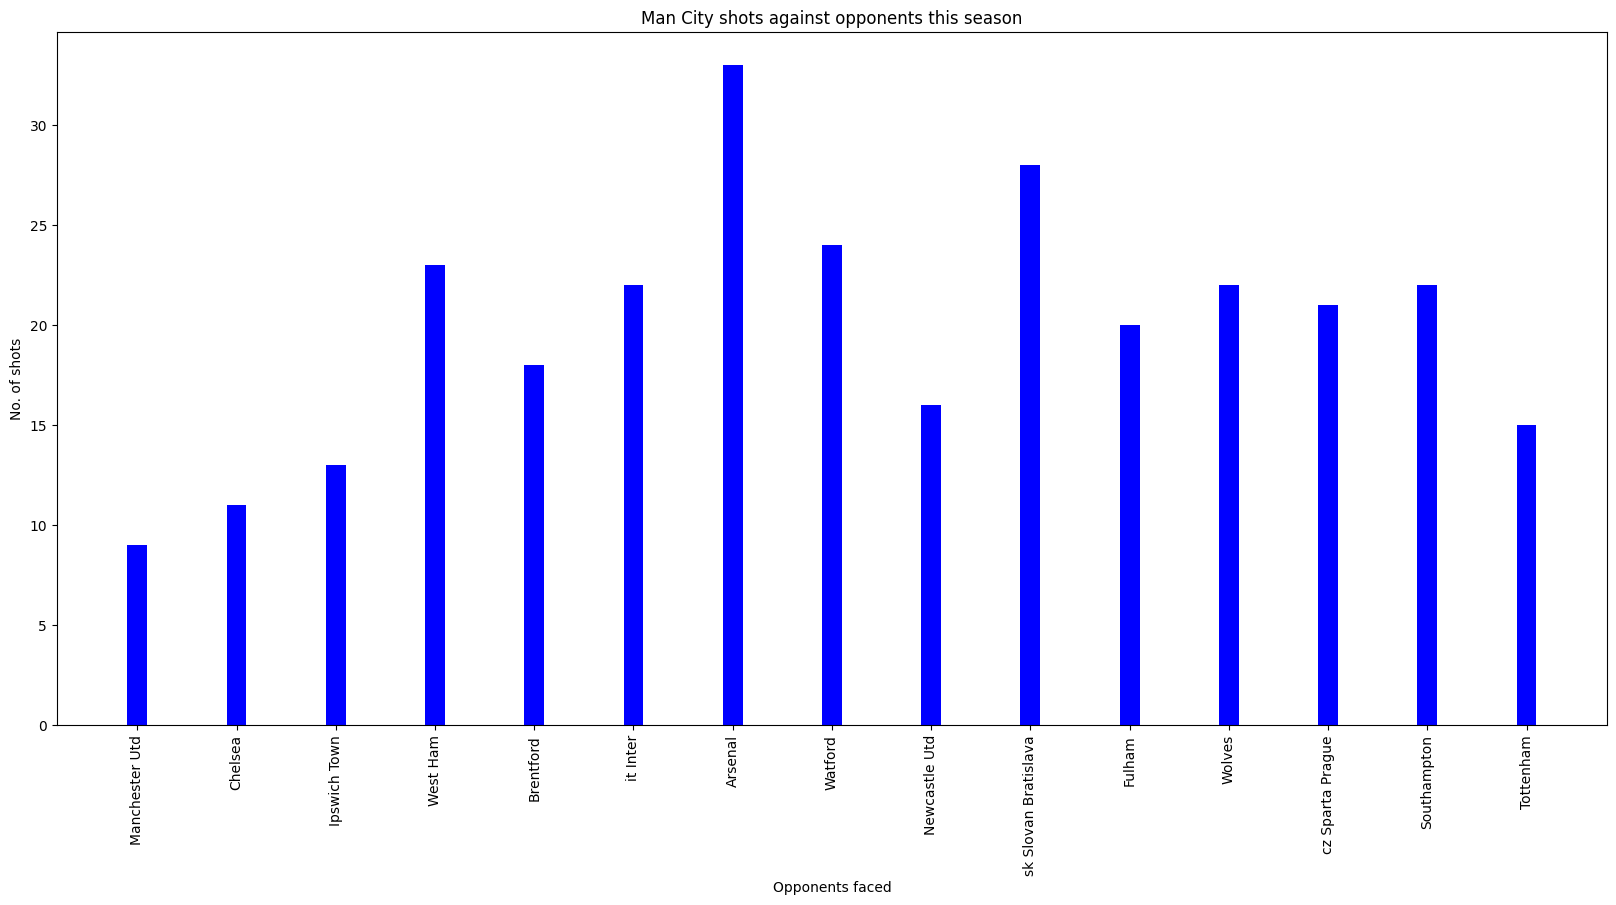

In [116]:
#%pip install numpy
#%pip install matplotlib

import numpy as np
import matplotlib.pyplot as plt 
 
  
# creating the dataset
opponents = list(team_data["Opponent"])
print(opponents)
shots = list(team_data["Sh"].values)
  
fig = plt.figure(figsize = (20,9))
 
# creating the bar plot
plt.bar(opponents, shots, color ='blue', 
        width = 0.2)
 
plt.xlabel("Opponents faced")
plt.xticks(rotation=90)
plt.ylabel("No. of shots")
plt.title("Man City shots against opponents this season")
plt.show()

In [117]:
#lets scale this method up!
#get the data for multiple teams for multiple seasons, not just one team for one season..
#get the data for the last 3 seasons
years = list(range(2025, 2023, -1))

In [122]:
years

[2025, 2024]

In [123]:
all_matches = []

In [124]:
standings_url = 'https://fbref.com/en/comps/9/Premier-League-Stats'

In [125]:
import time

for year in years:
    data = requests.get(standings_url)
    soup = BeautifulSoup(data.text)
    standings_table = soup.select('table.stats_table')[0] #css selector to select table with class name stats_table

    links = [l.get('href') for l in standings_table.find_all('a')]
    links = [l for l in links if '/squads/' in l]  #only want the links with /squads/ in it
    team_urls = [f"https://fbref.com{l}" for l in links] #create list of all the teams urls/links

    previous_season = soup.select("a.prev")[0].get("href")
    standings_url = f"https://fbref.com/{previous_season}"
    
    for team_url in team_urls:
        team_name = team_url.split("/")[-1].replace("-Stats", "").replace("-", "")

        data = requests.get(team_url)
        matches = pd.read_html(data.text, match="Scores & Fixtures")[0]
        time.sleep(5)

        soup = BeautifulSoup(data.text)
        links = [l.get('href') for l in soup.find_all("a")]
        links = [l for l in links if l and 'all_comps/shooting/' in l] #get link to shooting stats for team 
        link = f"https://fbref.com{links[0]}"
        data = requests.get(link)
        shooting = pd.read_html(data.text, match="Shooting")[0]
        shooting.columns = shooting.columns.droplevel()

        try:
            team_data = matches.merge(shooting[["Date", "Sh", "SoT", "Dist", "FK", "PK", "PKatt"]], on="Date")
        except ValueError:
            continue

        team_data = team_data[team_data["Comp"] == "Premier League"]
        print(team_name)
        team_data["Season"] = year #adding season column
        team_data["Team"] = team_name #adding team collumn
        all_matches.append(team_data)
        time.sleep(1)

IndexError: list index out of range

In [81]:
match_df = pd.concat(all_matches)

In [82]:
match_df.columns = [c.lower() for c in match_df.columns]

In [83]:
match_df.to_csv("matches2025.csv")

In [84]:
#match_df = match_df[(match_df['team'] == "Arsenal")]
#match_df